In [4]:
import numpy as np
from mldec.codes.repetition_code import compute_pr_important_examples, compute_pr_bad_examples
import matplotlib.pyplot as plt


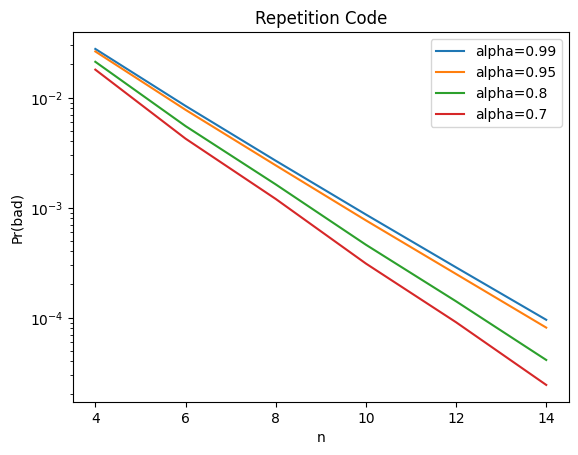

In [ ]:
p = 0.1
alpha = 0.05

nvals = list(range(4, 16, 2))
alphas = [0.99, .95, .8, .7]
prs_important_by_alpha = []

for alpha in alphas:
    prs_important = []
    for n in nvals:
        # pr_important = compute_pr_important_examples(n, p, p*alpha)
        pr_bad = compute_pr_bad_examples(n, p, p*alpha)
        prs_important.append(pr_bad)
    prs_important_by_alpha.append(prs_important)

fig, ax = plt.subplots()
for alpha, prs_important in zip(alphas, prs_important_by_alpha):
    ax.plot(nvals, prs_important, label=f"alpha={alpha}")
ax.semilogy()
ax.legend()
ax.set_xlabel("n")
ax.set_ylabel("Pr(bad)")
ax.set_title("Repetition Code")
plt.show()


In [31]:
from scipy.optimize import root_scalar


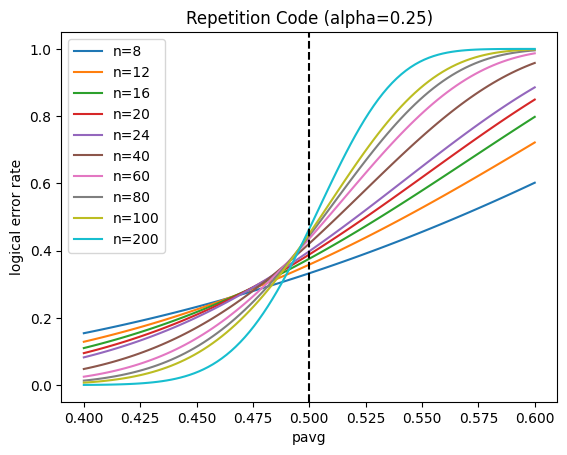

In [76]:
nvals = list(range(8, 28, 4)) + [40, 60, 80, 100, 200]
alpha = 0.25  # Fix alpha

nsamp = 101
pmin = 0.4
pmax = 0.6 # note, this is raw p not avg p
pavg_vals = np.concatenate(
    [np.linspace(pmin, 0.5, nsamp//2), [0.5],np.linspace(0.5, pmax, nsamp//2)]
)
prs_bad = []

for n in nvals:

    # compute the optimal beta
        # solve for the violation of wellorderedness 
    # def froot(x):
    #     return (x / (1-x)) ** (n//2) - ( (alpha * x) / (1 - alpha * x)) ** (n//2 - 2)

    # # find the root
    # root = root_scalar(froot, x0=0.5) #overshoot since 0 is also a root
    # print(f"n={n}, beta={root.root}")

    prs_bad_n = []
    for i,pavg in enumerate(pavg_vals):
        if pavg == 0.5:
            i_loc = i
        p = (2*pavg) / (1 + alpha)
        pr_bad = compute_pr_bad_examples(n, p, p*alpha)
        prs_bad_n.append(pr_bad)
    prs_bad.append(prs_bad_n)
# Plot the average p, rather than the raw p. This is because we can have p > 0.5 and still have the 
# average error rate less than 0.5.
fig, ax = plt.subplots()
# Change the marker at 'i_loc' index into a star for each curve
for n, prs_bad_n in zip(nvals, prs_bad):
    # ax.plot(pavg_vals, prs_bad_n, marker='o', label=f"n={n}", markersize=3)
    # # plot the special point at i_loc with a star
    # ax.plot(pavg_vals[i_loc], prs_bad_n[i_loc], marker='*', color=ax.lines[-1].get_color(), markersize=10)

    ax.plot(pavg_vals, prs_bad_n, marker=None, label=f"n={n}", markersize=3)
    # plot the special point at i_loc with a star
    ax.plot(pavg_vals[i_loc], prs_bad_n[i_loc], marker=None, color=ax.lines[-1].get_color(), markersize=10)

# ax.semilogy()
ax.set_xlabel("pavg")
ax.set_ylabel("logical error rate")
ax.set_title(f"Repetition Code (alpha={alpha})")
ax.legend()
ax.axvline(0.5, color='black', linestyle='--')
plt.show()


In [ ]:
vals = list(range(8, 28, 4)) + [44]
p_base = 0.1


nsamp = 30
alpha_vals = np.linspace(0.1, 1, nsamp)
beta_vals = np.linspace(0.9, 1/(2*p_base), nsamp)
prs_bad = []

for n in nvals:

    mld_diffs = []
    for i,beta in enumerate(beta_vals):
        p = (2*beta) / (1 + alpha)
        pr_bad_base = compute_pr_bad_examples(n, p_base, p_base*alpha)
        pr_bad_beta = compute_pr_bad_examples(n, beta*p_base, beta*p_base*alpha)
        prs_bad_n.append(pr_bad)
    prs_bad.append(prs_bad_n)
# Plot the average p, rather than the raw p. This is because we can have p > 0.5 and still have the 
# average error rate less than 0.5.
fig, ax = plt.subplots()
# Change the marker at 'i_loc' index into a star for each curve
for n, prs_bad_n in zip(nvals, prs_bad):
    # ax.plot(pavg_vals, prs_bad_n, marker='o', label=f"n={n}", markersize=3)
    # # plot the special point at i_loc with a star
    # ax.plot(pavg_vals[i_loc], prs_bad_n[i_loc], marker='*', color=ax.lines[-1].get_color(), markersize=10)

    ax.plot(pavg_vals, prs_bad_n, marker=None, label=f"n={n}", markersize=3)
    # plot the special point at i_loc with a star
    ax.plot(pavg_vals[i_loc], prs_bad_n[i_loc], marker=None, color=ax.lines[-1].get_color(), markersize=10)

# ax.semilogy()
ax.set_xlabel("pavg")
ax.set_ylabel("logical error rate")
ax.set_title(f"Repetition Code (alpha={alpha})")
ax.legend()
ax.axvline(0.5, color='black', linestyle='--')
plt.show()

ModuleNotFoundError: No module named 'mldec.codes.rep_code'

In [ ]:
``